In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("diamond.csv")
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,-1.469676,Ideal,E,SI2,61.5,55.0,5.786897,3.95,1.605430,1.232560
1,-1.560648,Premium,E,SI1,59.8,61.0,5.786897,3.89,1.576915,1.196948
2,-1.469676,Good,E,VS1,56.9,65.0,5.789960,4.05,1.623341,1.196948
3,-1.237874,Premium,I,VS2,62.4,58.0,5.811141,4.20,1.654411,1.289233
4,-1.171183,Good,J,SI2,63.3,58.0,5.814131,4.34,1.677097,1.321756


In [3]:
X = df.drop("price", axis = 1)
y = df["price"]

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 63)

***LinearRegression***

In [8]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = LinearRegression()

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9825273601077229
Testing Accuracy : 0.9837017173893157
Cross Validation Score : 0.9824934572613995
MAE : 0.10071473446826869


<Axes: ylabel='price'>

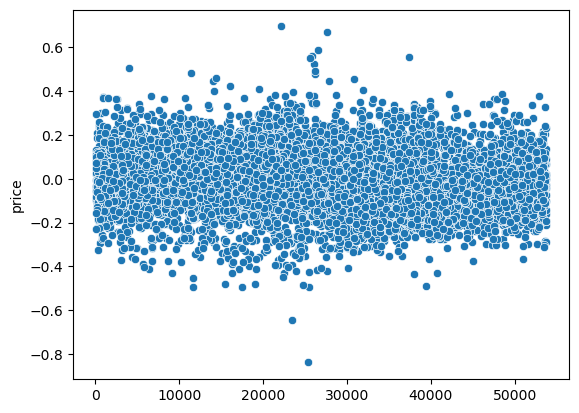

In [10]:
# Linearity of error
error = y_test - pred
sns.scatterplot(error)

In [11]:
# Normality of error
error.skew()

-0.00960652666228462

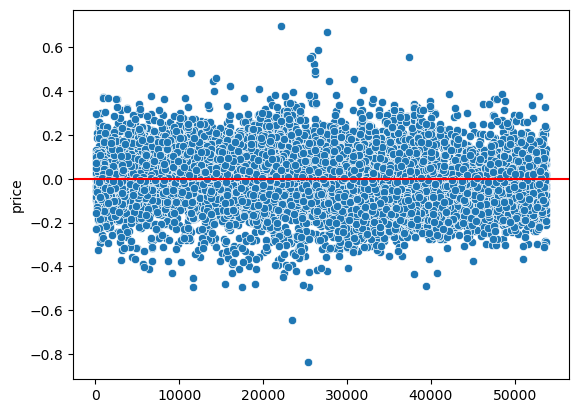

In [13]:
# Variability of error
sns.scatterplot(error)
plt.axhline(y = 0, color = "red")

***Ridge***

In [15]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = Ridge(alpha = 0.1)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9825273464004971
Testing Accuracy : 0.9837016820372884
Cross Validation Score : 0.9824935101062054
MAE : 0.1007137258695453


***Lasso***

In [16]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = Lasso(alpha = 0.001)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9814029472168115
Testing Accuracy : 0.9826793831046375
Cross Validation Score : 0.9813067007451431
MAE : 0.10258238456621775


***ElasticNet***

In [18]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = ElasticNet(alpha = 0.001, l1_ratio = 0.3)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9814364676564297
Testing Accuracy : 0.9826661561863412
Cross Validation Score : 0.9813717807116233
MAE : 0.1025847295144813


***SVR***

In [19]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = SVR()

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9908918947279799
Testing Accuracy : 0.9898128513609348
Cross Validation Score : 0.9892118382148565
MAE : 0.07729941809301374


***KNN***

In [20]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = KNeighborsRegressor(n_neighbors = 5)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
# print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9852338849295817
Testing Accuracy : 0.9775628455088772
MAE : 0.11025942598330657


***DecisionTreeRegressor***

In [21]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = DecisionTreeRegressor(max_depth = 12)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
# print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9913804909254289
Testing Accuracy : 0.9813923315538504
MAE : 0.09754737087063053


***RandomForestRegressor***

In [36]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = RandomForestRegressor(n_estimators = 500)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
# print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9986243332593709
Testing Accuracy : 0.9900752331557093
MAE : 0.06899219782748175


***AdaBoostRegressor***

In [29]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = AdaBoostRegressor(n_estimators = 300)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9598491843217043
Testing Accuracy : 0.9596794990426322
Cross Validation Score : 0.9565693442819276
MAE : 0.15980010097483974


***GradientBoostingRegressor***

In [31]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = GradientBoostingRegressor(n_estimators = 400)

pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

pipe.fit(X_train, y_train)
pred = pipe.predict(X_test)
print("Training Accuracy :", pipe.score(X_train, y_train))
print("Testing Accuracy :", pipe.score(X_test, y_test))
# print("Cross Validation Score :", cross_val_score(pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9913967272733399
Testing Accuracy : 0.9899077217520158
MAE : 0.07512911964898573


***XGBRegressor***

In [8]:
step = ColumnTransformer(transformers = [
    ("col_tnf", OneHotEncoder(sparse = False, drop = "first"), [1, 2, 3]),
    ("scaler", StandardScaler(), [0, 4, 5, 6, 7, 8])
], remainder = "passthrough")

dr = PCA(n_components= 23)
model = XGBRegressor(n_estimators = 500)

xgb_pipe = Pipeline([
    ("step", step),
    ("pca", dr),
    ("model", model)
])

xgb_pipe.fit(X_train, y_train)
pred = xgb_pipe.predict(X_test)
print("Training Accuracy :", xgb_pipe.score(X_train, y_train))
print("Testing Accuracy :", xgb_pipe.score(X_test, y_test))
print("Cross Validation Score :", cross_val_score(xgb_pipe, X_train, y_train, cv = 5).mean())
print("MAE :", mean_absolute_error(y_test, pred))

Training Accuracy : 0.9984839539114834
Testing Accuracy : 0.9904706299910429
Cross Validation Score : 0.989618826929577
MAE : 0.07086069244726827


# ***FINAL MODEl***
- XGBRegressor is our final model which provides almost 99% accuracy for both training and testing data.
- It also provide cv_score almost 98% with least mean absolute error.

In [9]:
new_data = pd.DataFrame({
    "carat":0.21,
    "cut":"Premium",
    "color":"E",
    "clarity":"SI1",
    "depth":59.8,
    "table":61,
    "x":3.89,
    "y":3.84,
    "z":2.31
}, index = [0])

new_data["carat"] = np.log(new_data["carat"])
new_data["y"] = np.log(new_data["y"] + 1)
new_data["z"] = np.log(new_data["z"] + 1)

new_data

,carat,cut,color,clarity,depth,table,x,y,z
0,-1.560648,Premium,E,SI1,59.8,61,3.89,1.576915,1.196948


In [12]:
np.exp(xgb_pipe.predict(new_data)[0])

323.74924

In [13]:
import pickle
with open("xgb_diamond_model.pickle", "wb") as f:
    pickle.dump(xgb_pipe, f)